# Bank Marketing data set
Bank client data:

1 - 'Age': (numeric)

2 - 'Job': type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid', 'management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - 'Marital Status': marital status (categorical: 'divorced','married','single','unknown', 'divorced' means divorced or widowed)

4 - 'Education',: (categorical: primary, secondary, tertiary and unknown)

5 - 'Credit Default': has credit in default? (categorical: 'no','yes','unknown')

6 - 'Average Yearly Balance': Balance of the individual.

7 - 'Housing Loan': has housing loan? (categorical: 'no','yes','unknown')

8 - 'Personal Loan': has personal loan? (categorical: 'no','yes','unknown')

Related with the last contact of the current campaign:
9 - 'Communication Type': contact communication type (categorical: 'cellular','telephone')

10 - 'Last Contact Day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - 'Last Contact Month': last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

12 - 'Last Call Duration': last contact duration, in seconds (numeric).

Other attributes:
13 - 'No of Campaign': number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - 'No of days passed after last contact': number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

15 - 'Previous Contact Before Campaign': number of contacts performed before this campaign and for this client (numeric)

16 - 'Outcome of Previous Campaign': outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Output variable (desired target):
'Target' - has the client subscribed a term deposit? (binary: 'yes','no')

# PROBLEM STATEMENT

There has been a revenue decline for the Portuguese bank and they would like to know what actions
to take. After investigation, we found out that the root cause is that their clients are not depositing
as frequently as before.
Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so
banks can invest in higher gain financial products to make a profit. In addition, banks also hold better
chance to persuade term deposit clients into buying other products such as funds or insurance to
further increase their revenues.
The Portuguese bank would like to identify existing clients that have higher chance to subscribe for a
term deposit and focus marketing effort on such clients.

Find the best strategies to improve for the next marketing campaign. How can the financial institution have a greater effectiveness for future marketing campaigns? In order to answer this, we have to analyze the last marketing campaign the bank performed and identify the patterns that will help us find conclusions in order to develop future strategies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#loading the data
bank = pd.read_csv("bank-full.csv",sep=';')
pd.set_option('display.max_columns',None)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
bank.shape

(45211, 17)

In [4]:
bank['y'].unique()

array(['no', 'yes'], dtype=object)

In [5]:
bank.loc[bank["y"]=="no",'y']=0
bank.loc[bank["y"]=="yes",'y']=1
bank.head()#encoding the target with 0 and 1 respectively

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [6]:
bank['y']=bank['y'].astype(int)

In [7]:
# checking the type of each attribute
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int32
dtype: object


### SUMMARY

In [8]:
bank.describe(include='all').fillna(0).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211,0,0,0,40.9362,10.6188,18,33,39,48,95
job,45211,12,blue-collar,9732,0,0,0,0,0,0,0
marital,45211,3,married,27214,0,0,0,0,0,0,0
education,45211,4,secondary,23202,0,0,0,0,0,0,0
default,45211,2,no,44396,0,0,0,0,0,0,0
balance,45211,0,0,0,1362.27,3044.77,-8019,72,448,1428,102127
housing,45211,2,yes,25130,0,0,0,0,0,0,0
loan,45211,2,no,37967,0,0,0,0,0,0,0
contact,45211,3,cellular,29285,0,0,0,0,0,0,0
day,45211,0,0,0,15.8064,8.32248,1,8,16,21,31


In [9]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### Observation : There are no null values

In [10]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int32 
dtypes: int32(1), int64(7), object(9)
memory usage: 5.7+ MB


In [11]:
for col in bank.select_dtypes(include='object').columns:
    print(col)
    print(bank[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']


# EXPLORATORY DATA ANALYSIS

EDA can be approached in 2 ways

Univariate analysis

a. to understand the central tendency and spread of numerical variables

b. to understand the proportion of the various levels of categorical variables

Bivariate & Multivariate analysis

a. Understand the relationship between 2 variables

b. Visualise the impact of various X variables on Y variable, thereby giving clues for feature selection

# Univariate Analysis

## Age

{'Mean': 40.93621021432837, 'Median': 39.0, 'Mode': 32}


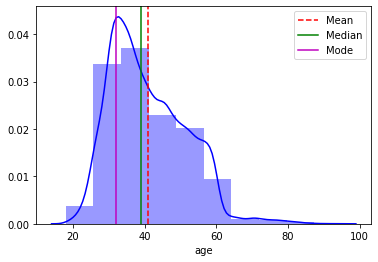

In [14]:
a=sns.distplot(bank['age'],color='blue',bins=10 )
mean=bank['age'].mean()
median=bank['age'].median()
mode=bank['age'].mode()[0]
print({'Mean':mean,'Median':median,'Mode':mode})
a.axvline(mean, color='r', linestyle='--')
a.axvline(median, color='g', linestyle='-')
a.axvline(mode, color='m', linestyle='-')
plt.legend({'Mean':mean,'Median':median,'Mode':mode})
plt.show()

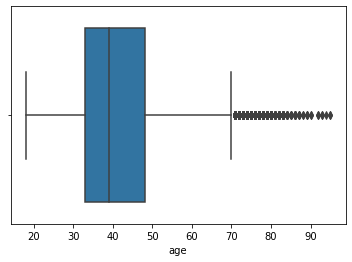

In [15]:
sns.boxplot(bank["age"])
plt.show()

## Balance

{'Mean': 1362.2720576850766, 'Median': 448.0, 'Mode': 0}


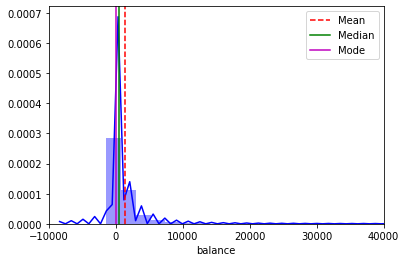

In [16]:
b=sns.distplot(bank['balance'],color='blue', kde=True)
mean=bank['balance'].mean()
median=bank['balance'].median()
mode=bank['balance'].mode()[0]
print({'Mean':mean,'Median':median,'Mode':mode})
b.axvline(mean, color='r', linestyle='--')
b.axvline(median, color='g', linestyle='-')
b.axvline(mode, color='m', linestyle='-')
plt.legend({'Mean':mean,'Median':median,'Mode':mode})
plt.xlim(-10000,40000)
plt.show()

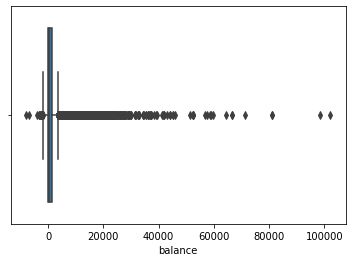

In [17]:
sns.boxplot(bank["balance"])
plt.show()

## Day

{'Mean': 15.80641879188693, 'Median': 16.0, 'Mode': 20}


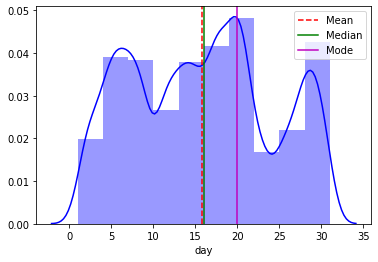

In [18]:
d=sns.distplot(bank['day'],color='blue',bins=10 )
mean=bank['day'].mean()
median=bank['day'].median()
mode=bank['day'].mode()[0]
print({'Mean':mean,'Median':median,'Mode':mode})
d.axvline(mean, color='r', linestyle='--')
d.axvline(median, color='g', linestyle='-')
d.axvline(mode, color='m', linestyle='-')
plt.legend({'Mean':mean,'Median':median,'Mode':mode})
plt.show()



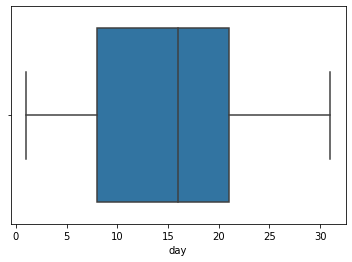

In [19]:
sns.boxplot(bank["day"])
plt.show()

## Duration

{'Mean': 258.1630797814691, 'Median': 180.0, 'Mode': 124}


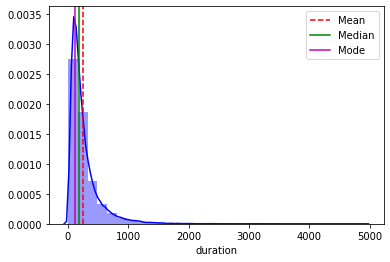

In [20]:
du=sns.distplot(bank['duration'],color='blue',bins=30 )
mean=bank['duration'].mean()
median=bank['duration'].median()
mode=bank['duration'].mode()[0]
print({'Mean':mean,'Median':median,'Mode':mode})
du.axvline(mean, color='r', linestyle='--')
du.axvline(median, color='g', linestyle='-')
du.axvline(mode, color='m', linestyle='-')
plt.legend({'Mean':mean,'Median':median,'Mode':mode})
plt.show()


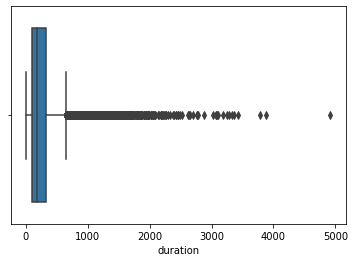

In [21]:
sns.boxplot(bank['duration'])
plt.show()

## No. of Campaign

{'Mean': 2.763840658246887, 'Median': 2.0, 'Mode': 1}


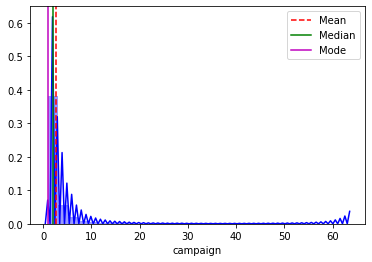

In [22]:
c=sns.distplot(bank['campaign'],color='blue',bins=30 )
mean=bank['campaign'].mean()
median=bank['campaign'].median()
mode=bank['campaign'].mode()[0]
print({'Mean':mean,'Median':median,'Mode':mode})
c.axvline(mean, color='r', linestyle='--')
c.axvline(median, color='g', linestyle='-')
c.axvline(mode, color='m', linestyle='-')
plt.legend({'Mean':mean,'Median':median,'Mode':mode})
plt.show()


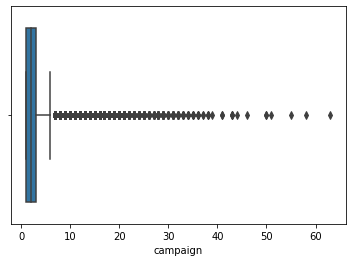

In [23]:
sns.boxplot(bank['campaign'])
plt.show()

## Pdays

{'Mean': 40.19782796222158, 'Median': -1.0, 'Mode': -1}


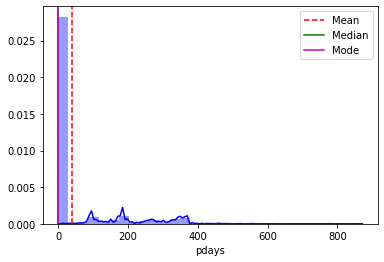

In [24]:
pdays=sns.distplot(bank['pdays'],kde=True,color='blue',bins=30 )
mean=bank['pdays'].mean()
median=bank['pdays'].median()
mode=bank['pdays'].mode()[0]
print({'Mean':mean,'Median':median,'Mode':mode})
pdays.axvline(mean, color='r', linestyle='--')
pdays.axvline(median, color='g', linestyle='-')
pdays.axvline(mode, color='m', linestyle='-')
plt.legend({'Mean':mean,'Median':median,'Mode':mode})
plt.show()


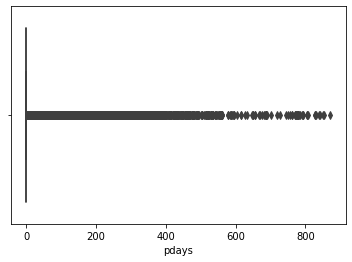

In [25]:
sns.boxplot(bank['pdays'])


## Previous

{'Mean': 0.5803233726305546, 'Median': 0.0, 'Mode': 0}


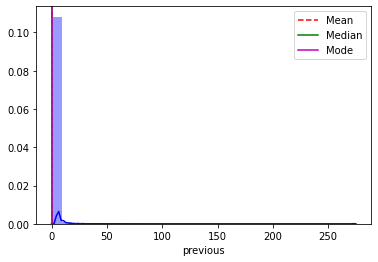

In [26]:
c=sns.distplot(bank['previous'],color='blue',bins=30)
mean=bank['previous'].mean()
median=bank['previous'].median()
mode=bank['previous'].mode()[0]
print({'Mean':mean,'Median':median,'Mode':mode})
c.axvline(mean, color='r', linestyle='--')
c.axvline(median, color='g', linestyle='-')
c.axvline(mode, color='m', linestyle='-')
plt.legend({'Mean':mean,'Median':median,'Mode':mode})
plt.show()

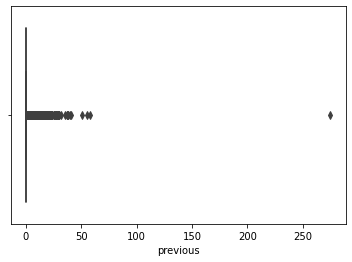

In [27]:
sns.boxplot(bank['previous'])

## Job

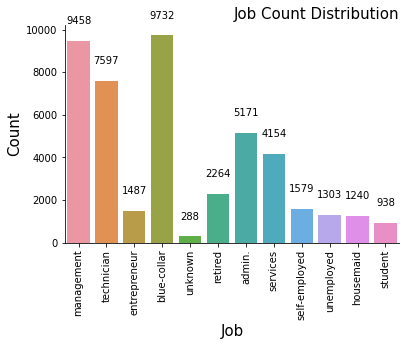

In [28]:
s=sns.countplot(x = 'job', data = bank)
plt.xticks(rotation=90)
s.set_xlabel('Job', fontsize=15)
s.set_ylabel('Count', fontsize=15)
s.set_title('Job Count Distribution', fontsize=15, loc='right')

for p in s.patches:
    s.annotate("%s" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', rotation=0, xytext=(0, 20), textcoords='offset points')  #vertical barsplt.show()
sns.despine(top=True)


## Marital

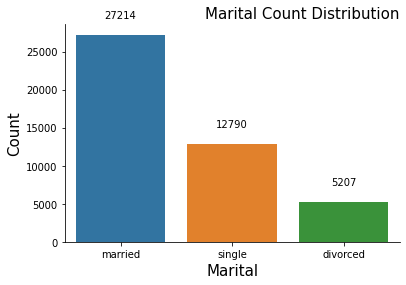

In [29]:
s=sns.countplot(x = 'marital', data = bank)
plt.xticks(rotation=0)
s.set_xlabel('Marital', fontsize=15)
s.set_ylabel('Count', fontsize=15)
s.set_title('Marital Count Distribution', fontsize=15, loc='right')

for p in s.patches:
    s.annotate("%s" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', rotation=0, xytext=(0, 20), textcoords='offset points')  #vertical barsplt.show()
sns.despine(top=True)


## Education

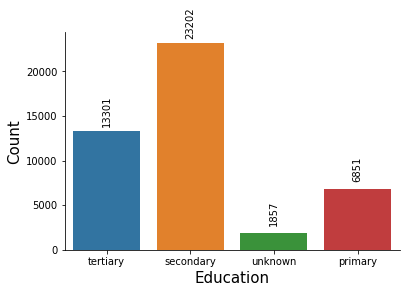

In [30]:
s=sns.countplot(x = 'education', data = bank)
plt.xticks(rotation=0)
s.set_xlabel('Education', fontsize=15)
s.set_ylabel('Count', fontsize=15)

for p in s.patches:
    s.annotate("%s" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', rotation=90, xytext=(0, 20), textcoords='offset points')  #vertical barsplt.show()
sns.despine(top=True)

## Default

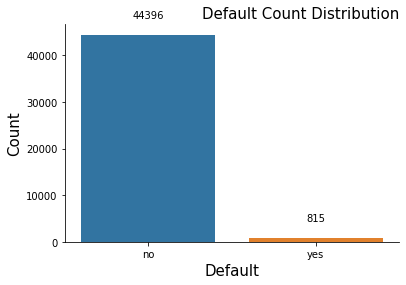

In [31]:
s=sns.countplot(x = 'default', data = bank)
plt.xticks(rotation=0)
s.set_xlabel('Default', fontsize=15)
s.set_ylabel('Count', fontsize=15)
s.set_title('Default Count Distribution', fontsize=15, loc='right')

for p in s.patches:
    s.annotate("%s" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', rotation=0, xytext=(0, 20), textcoords='offset points')  #vertical barsplt.show()
sns.despine(top=True)

## Housing

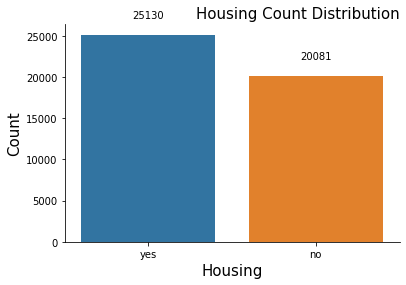

In [32]:
s=sns.countplot(x = 'housing', data = bank)
plt.xticks(rotation=0)
s.set_xlabel('Housing', fontsize=15)
s.set_ylabel('Count', fontsize=15)
s.set_title('Housing Count Distribution', fontsize=15, loc='right')

for p in s.patches:
    s.annotate("%s" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', rotation=0, xytext=(0, 20), textcoords='offset points')  #vertical barsplt.show()
sns.despine(top=True)

## Loan

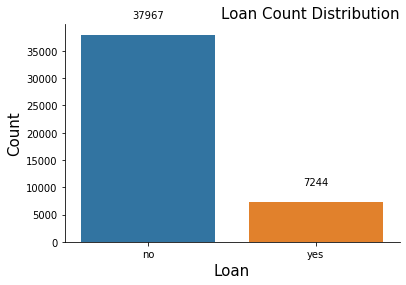

In [33]:
s=sns.countplot(x = 'loan', data = bank)
plt.xticks(rotation=0)
s.set_xlabel('Loan', fontsize=15)
s.set_ylabel('Count', fontsize=15)
s.set_title('Loan Count Distribution', fontsize=15, loc='right')

for p in s.patches:
    s.annotate("%s" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', rotation=0, xytext=(0, 20), textcoords='offset points')  #vertical barsplt.show()
sns.despine(top=True)

## Contact

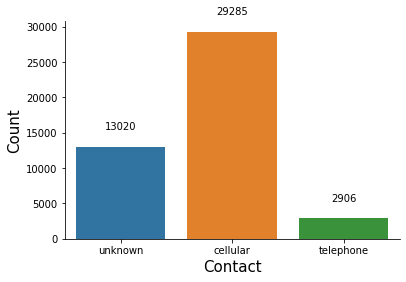

In [34]:
s=sns.countplot(x = 'contact', data = bank)
plt.xticks(rotation=0)
s.set_xlabel('Contact', fontsize=15)
s.set_ylabel('Count', fontsize=15)

for p in s.patches:
    s.annotate("%s" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', rotation=0, xytext=(0, 20), textcoords='offset points')  #vertical barsplt.show()
sns.despine(top=True)

## Month

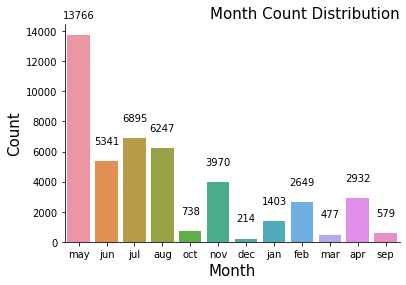

In [35]:
s=sns.countplot(x = 'month', data = bank)
plt.xticks(rotation=0)
s.set_xlabel('Month', fontsize=15)
s.set_ylabel('Count', fontsize=15)
s.set_title('Month Count Distribution', fontsize=15, loc='right')

for p in s.patches:
    s.annotate("%s" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', rotation=0, xytext=(0, 20), textcoords='offset points')  #vertical barsplt.show()
sns.despine(top=True)

## POutcome

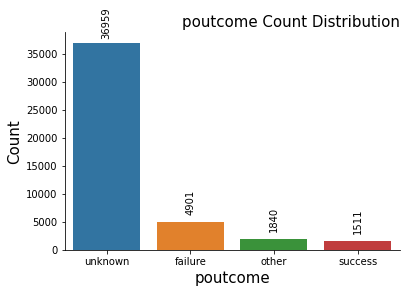

In [36]:
s=sns.countplot(x = 'poutcome', data = bank)
plt.xticks(rotation=0)
s.set_xlabel('poutcome', fontsize=15)
s.set_ylabel('Count', fontsize=15)
s.set_title('poutcome Count Distribution', fontsize=15, loc='right')

for p in s.patches:
    s.annotate("%s" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', rotation=90, xytext=(0, 20), textcoords='offset points')  #vertical barsplt.show()
sns.despine(top=True)

## y (Target)

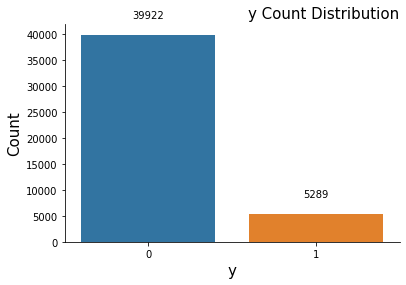

In [37]:
s=sns.countplot(x = 'y', data = bank)
plt.xticks(rotation=0)
s.set_xlabel('y', fontsize=15)
s.set_ylabel('Count', fontsize=15)
s.set_title('y Count Distribution', fontsize=15, loc='right')

for p in s.patches:
    s.annotate("%s" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', rotation=0, xytext=(0, 20), textcoords='offset points')  #vertical barsplt.show()
sns.despine(top=True)

#### Observation : There is a higher class imbalance. So we can balance the class by over-sampling the minority class using SMOTE.

## Outlier Detection:

In [12]:
num_cols=['age','balance','pdays','duration','campaign']
def outlier_treatment(col):
    Q1=bank[col].quantile(0.25)
    Q3=bank[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    df=pd.DataFrame({'Lower Range':lower_range,'Upper Range':upper_range,
                     'Outlier(No.)(LR)':bank[bank[col]<lower_range][col].count(),
                     ' Outlier(%)(LR)':round(bank[bank[col] < lower_range][col].count()*100/len(bank),2),
                     'Outlier(No.)(UR)':bank[bank[col]>upper_range][col].count(),
                     'Outlier(%)(UR)':round(bank[bank[col]>upper_range][col].count()*100/len(bank),2)},
                    index=num_cols)
    display(df)
outlier_treatment(num_cols)

,Lower Range,Upper Range,Outlier(No.)(LR),Outlier(%)(LR),Outlier(No.)(UR),Outlier(%)(UR)
age,10.5,70.5,0,0.00,487,1.08
balance,-1962.0,3462.0,17,0.04,4712,10.42
pdays,-1.0,-1.0,0,0.00,8257,18.26
duration,-221.0,643.0,0,0.00,3235,7.16
campaign,-2.0,6.0,0,0.00,3064,6.78


#### Observation : Some data points are beyond the upper whisker. But in this case we are not considering these as outliers, instead we take them as extreme values, as those clients who are beyond the upper whisker are more likely to deposit. So we cannot treat them as outliers.

# BIVARIATE ANALYSIS

### Age vs y

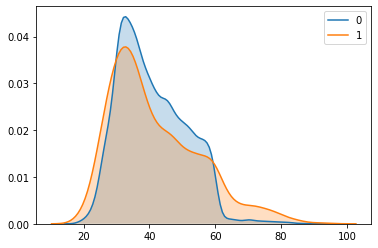

In [39]:
sns.kdeplot(bank[bank['y']==0]['age'],shade=True)
sns.kdeplot(bank[bank['y']==1]['age'],shade=True)
plt.legend({'0':bank[bank['y']==0],'1':bank[bank['y']==1]})
plt.show()

### Balance vs y

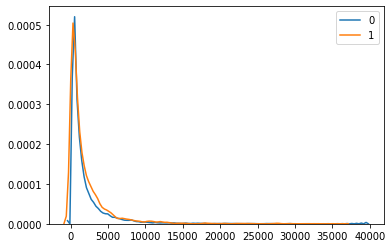

In [40]:
sns.kdeplot(bank[bank['y']==0]['balance'],clip=(0,40000))
sns.kdeplot(bank[bank['y']==1]['balance'],clip=(0,40000))
plt.legend({'0':bank[bank['y']==0],'1':bank[bank['y']==1]})
plt.show()

### day vs y

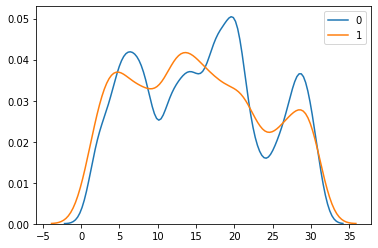

In [41]:
sns.kdeplot(bank[bank['y']==0]['day'],clip=(0,40000))
sns.kdeplot(bank[bank['y']==1]['day'],clip=(0,40000))
plt.legend({'0':bank[bank['y']==0],'1':bank[bank['y']==1]})
plt.show()

### Duration vs y

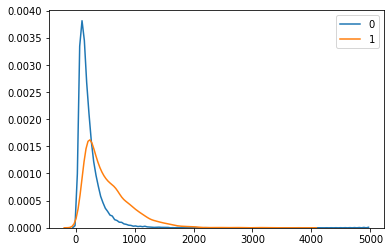

In [42]:
sns.kdeplot(bank[bank['y']==0]['duration'],clip=(0,40000))
sns.kdeplot(bank[bank['y']==1]['duration'],clip=(0,40000))
plt.legend({'0':bank[bank['y']==0],'1':bank[bank['y']==1]})
plt.show()

### Campaign vs y

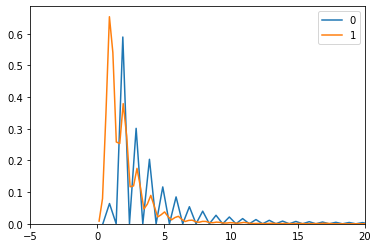

In [43]:
sns.kdeplot(bank[bank['y']==0]['campaign'],clip=(0,40000))
sns.kdeplot(bank[bank['y']==1]['campaign'],clip=(0,40000))
plt.legend({'0':bank[bank['y']==0],'1':bank[bank['y']==1]})
plt.xlim(-5,20)
plt.show()

## Job vs y

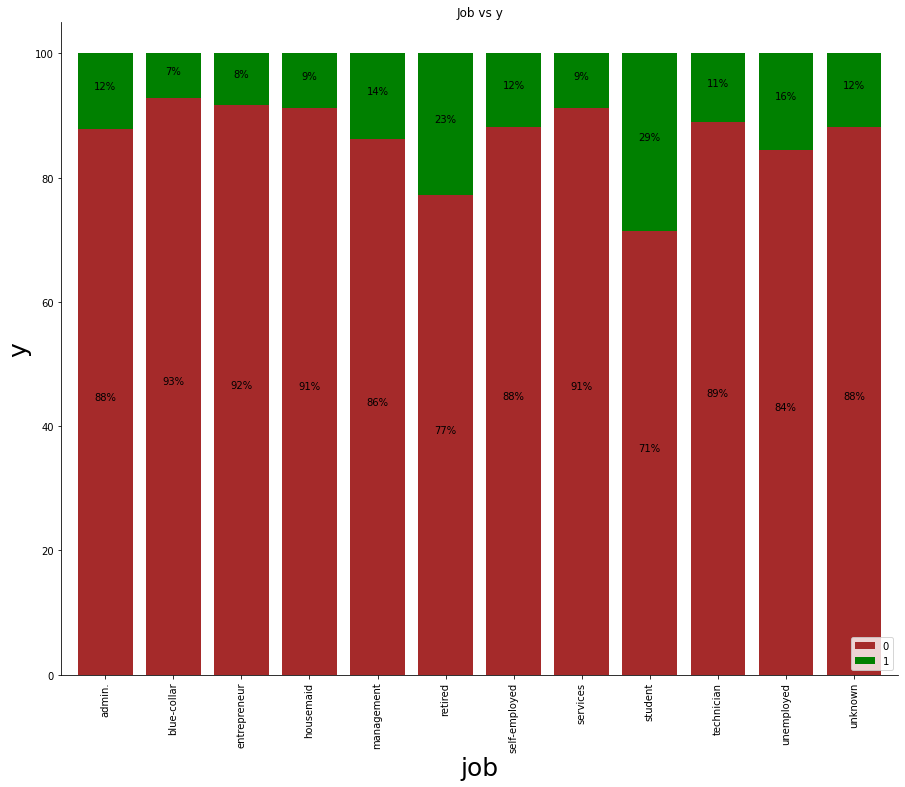

In [44]:
j=pd.crosstab(bank["job"],bank["y"]).apply(lambda r: r/r.sum()*100, axis=1)

from matplotlib import rcParams
rcParams["figure.figsize"]=15,12
s=j.plot(kind='bar', stacked=True, width=0.8,color=['brown','green'])
s.set_xlabel('job', fontsize=25)
plt.xticks(rotation=90)
s.set_ylabel('y', fontsize=25)
plt.yticks(rotation=0)
plt.legend(loc='lower right')
plt.title('Job vs y')

for p in s.patches:
    height = p.get_height()
    s.text(p.get_x() + p.get_width() / 2, p.get_y() + height / 2, "{:.0f}%".format(height),
           ha = 'center', va='bottom')
plt.rcParams.update({'font.size': 20})

sns.despine(top=True)


## Housing vs y

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'bottom'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


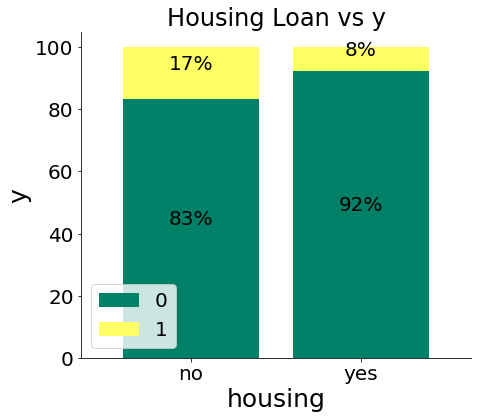

In [45]:
hl=pd.crosstab(bank["housing"],bank["y"]).apply(lambda r: r/r.sum()*100, axis=1)

from matplotlib import rcParams
rcParams["figure.figsize"]=7,6
s=hl.plot(kind='bar', stacked=True, width=0.8,cmap='summer')
s.set_xlabel('housing', fontsize=25)
plt.xticks(rotation=0)
s.set_ylabel('y', fontsize=25)
plt.yticks(rotation=0)
plt.legend(loc='bottom')
plt.title('Housing Loan vs y')

for p in s.patches:
    height = p.get_height()
    s.text(p.get_x() + p.get_width() / 2, p.get_y() + height / 2, "{:.0f}%".format(height),
           ha = 'center', va='bottom')
plt.rcParams.update({'font.size': 20})

sns.despine(top=True)


## Default vs y

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'bottom'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


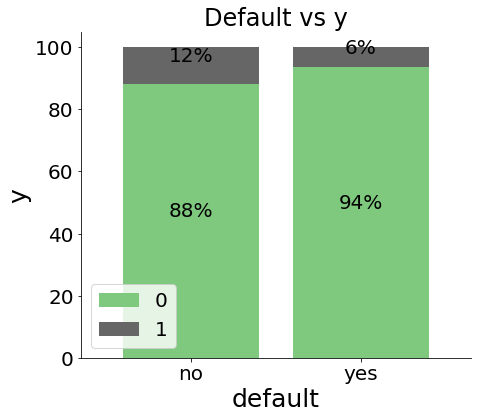

In [46]:
de=pd.crosstab(bank["default"],bank["y"]).apply(lambda r: r/r.sum()*100, axis=1)

from matplotlib import rcParams
rcParams["figure.figsize"]=7,6
s=de.plot(kind='bar', stacked=True, width=0.8,cmap='Accent')
s.set_xlabel('default', fontsize=25)
plt.xticks(rotation=0)
s.set_ylabel('y', fontsize=25)
plt.yticks(rotation=0)
plt.legend(loc='bottom')
plt.title('Default vs y')

for p in s.patches:
    height = p.get_height()
    s.text(p.get_x() + p.get_width() / 2, p.get_y() + height / 2, "{:.0f}%".format(height),
           ha = 'center', va='bottom')
plt.rcParams.update({'font.size': 20})

sns.despine(top=True)


## Education vs y

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'bottom'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


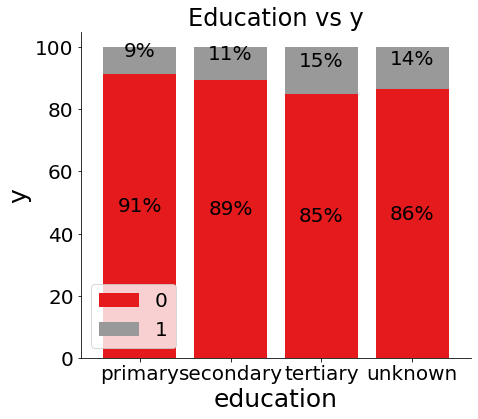

In [47]:
e=pd.crosstab(bank["education"],bank["y"]).apply(lambda r: r/r.sum()*100, axis=1)

from matplotlib import rcParams
rcParams["figure.figsize"]=7,6
s=e.plot(kind='bar', stacked=True, width=0.8,cmap='Set1')
s.set_xlabel('education', fontsize=25)
plt.xticks(rotation=0)
s.set_ylabel('y', fontsize=25)
plt.yticks(rotation=0)
plt.legend(loc='bottom')
plt.title('Education vs y')

for p in s.patches:
    height = p.get_height()
    s.text(p.get_x() + p.get_width() / 2, p.get_y() + height / 2, "{:.0f}%".format(height),
           ha = 'center', va='bottom')
plt.rcParams.update({'font.size': 20})

sns.despine(top=True)


## Marital vs y

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'bottom'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


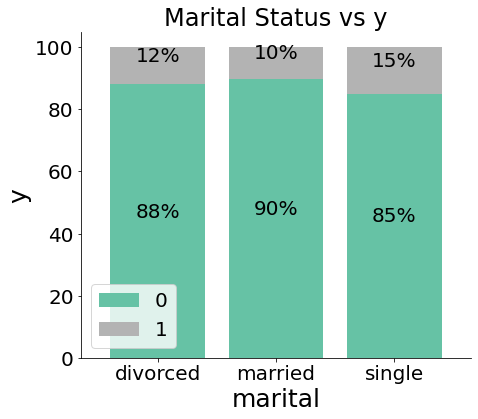

In [48]:
ms=pd.crosstab(bank["marital"],bank["y"]).apply(lambda r: r/r.sum()*100, axis=1)

from matplotlib import rcParams
rcParams["figure.figsize"]=7,6
s=ms.plot(kind='bar', stacked=True, width=0.8,cmap='Set2')
s.set_xlabel('marital', fontsize=25)
plt.xticks(rotation=0)
s.set_ylabel('y', fontsize=25)
plt.yticks(rotation=0)
plt.legend(loc='bottom')
plt.title('Marital Status vs y')

for p in s.patches:
    height = p.get_height()
    s.text(p.get_x() + p.get_width() / 2, p.get_y() + height / 2, "{:.0f}%".format(height),
           ha = 'center', va='bottom')
plt.rcParams.update({'font.size': 20})

sns.despine(top=True)



## Loan vs y

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'bottom'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


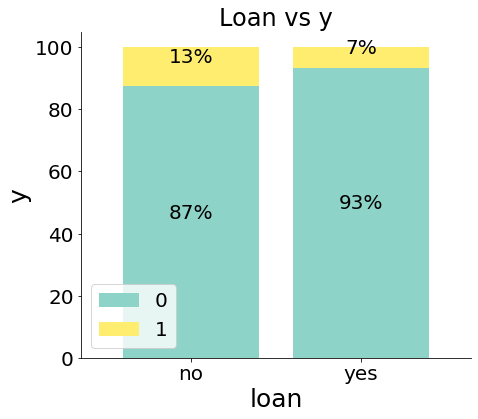

In [49]:
pl=pd.crosstab(bank["loan"],bank["y"]).apply(lambda r: r/r.sum()*100, axis=1)

from matplotlib import rcParams
rcParams["figure.figsize"]=7,6
s=pl.plot(kind='bar', stacked=True, width=0.8,cmap='Set3')
s.set_xlabel('loan', fontsize=25)
plt.xticks(rotation=0)
s.set_ylabel('y', fontsize=25)
plt.yticks(rotation=0)
plt.legend(loc='bottom')
plt.title('Loan vs y')

for p in s.patches:
    height = p.get_height()
    s.text(p.get_x() + p.get_width() / 2, p.get_y() + height / 2, "{:.0f}%".format(height),
           ha = 'center', va='bottom')
plt.rcParams.update({'font.size': 20})

sns.despine(top=True)


## Month vs y

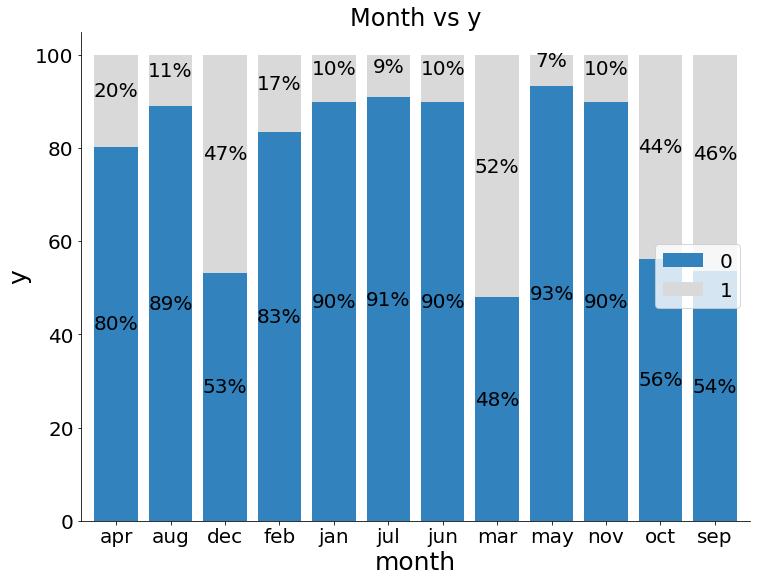

In [50]:
m=pd.crosstab(bank["month"],bank["y"]).apply(lambda r: r/r.sum()*100, axis=1)

from matplotlib import rcParams
rcParams["figure.figsize"]=12,9
s=m.plot(kind='bar', stacked=True, width=0.8,cmap='tab20c')
s.set_xlabel('month', fontsize=25)
plt.xticks(rotation=0)
s.set_ylabel('y', fontsize=25)
plt.yticks(rotation=0)
plt.legend(loc='right')
plt.title('Month vs y')

for p in s.patches:
    height = p.get_height()
    s.text(p.get_x() + p.get_width() / 2, p.get_y() + height / 2, "{:.0f}%".format(height),
           ha = 'center', va='bottom')
plt.rcParams.update({'font.size': 20})

sns.despine(top=True)


## Contact vs y

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'bottom'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


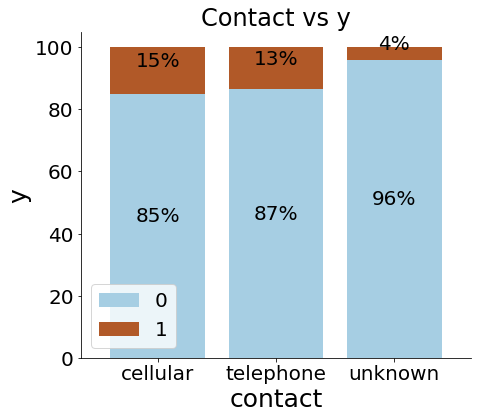

In [51]:
c=pd.crosstab(bank["contact"],bank["y"]).apply(lambda r: r/r.sum()*100, axis=1)

from matplotlib import rcParams
rcParams["figure.figsize"]=7,6
s=c.plot(kind='bar', stacked=True, width=0.8,cmap='Paired')
s.set_xlabel('contact', fontsize=25)
plt.xticks(rotation=0)
s.set_ylabel('y', fontsize=25)
plt.yticks(rotation=0)
plt.legend(loc='bottom')
plt.title('Contact vs y')

for p in s.patches:
    height = p.get_height()
    s.text(p.get_x() + p.get_width() / 2, p.get_y() + height / 2, "{:.0f}%".format(height),
           ha = 'center', va='bottom')
plt.rcParams.update({'font.size': 20})

sns.despine(top=True)


## POutcome vs y

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'bottom'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


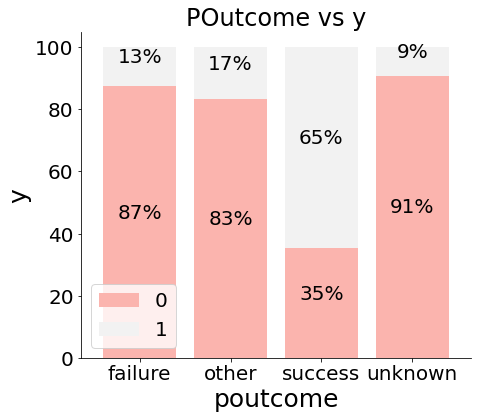

In [52]:
po=pd.crosstab(bank["poutcome"],bank["y"]).apply(lambda r: r/r.sum()*100, axis=1)

from matplotlib import rcParams
rcParams["figure.figsize"]=7,6
s=po.plot(kind='bar', stacked=True, width=0.8,cmap='Pastel1')
s.set_xlabel('poutcome', fontsize=25)
plt.xticks(rotation=0)
s.set_ylabel('y', fontsize=25)
plt.yticks(rotation=0)
plt.legend(loc='bottom')
plt.title('POutcome vs y')

for p in s.patches:
    height = p.get_height()
    s.text(p.get_x() + p.get_width() / 2, p.get_y() + height / 2, "{:.0f}%".format(height),
           ha = 'center', va='bottom')
plt.rcParams.update({'font.size': 20})

sns.despine(top=True)


# MULTIVARIATE ANALYSIS 

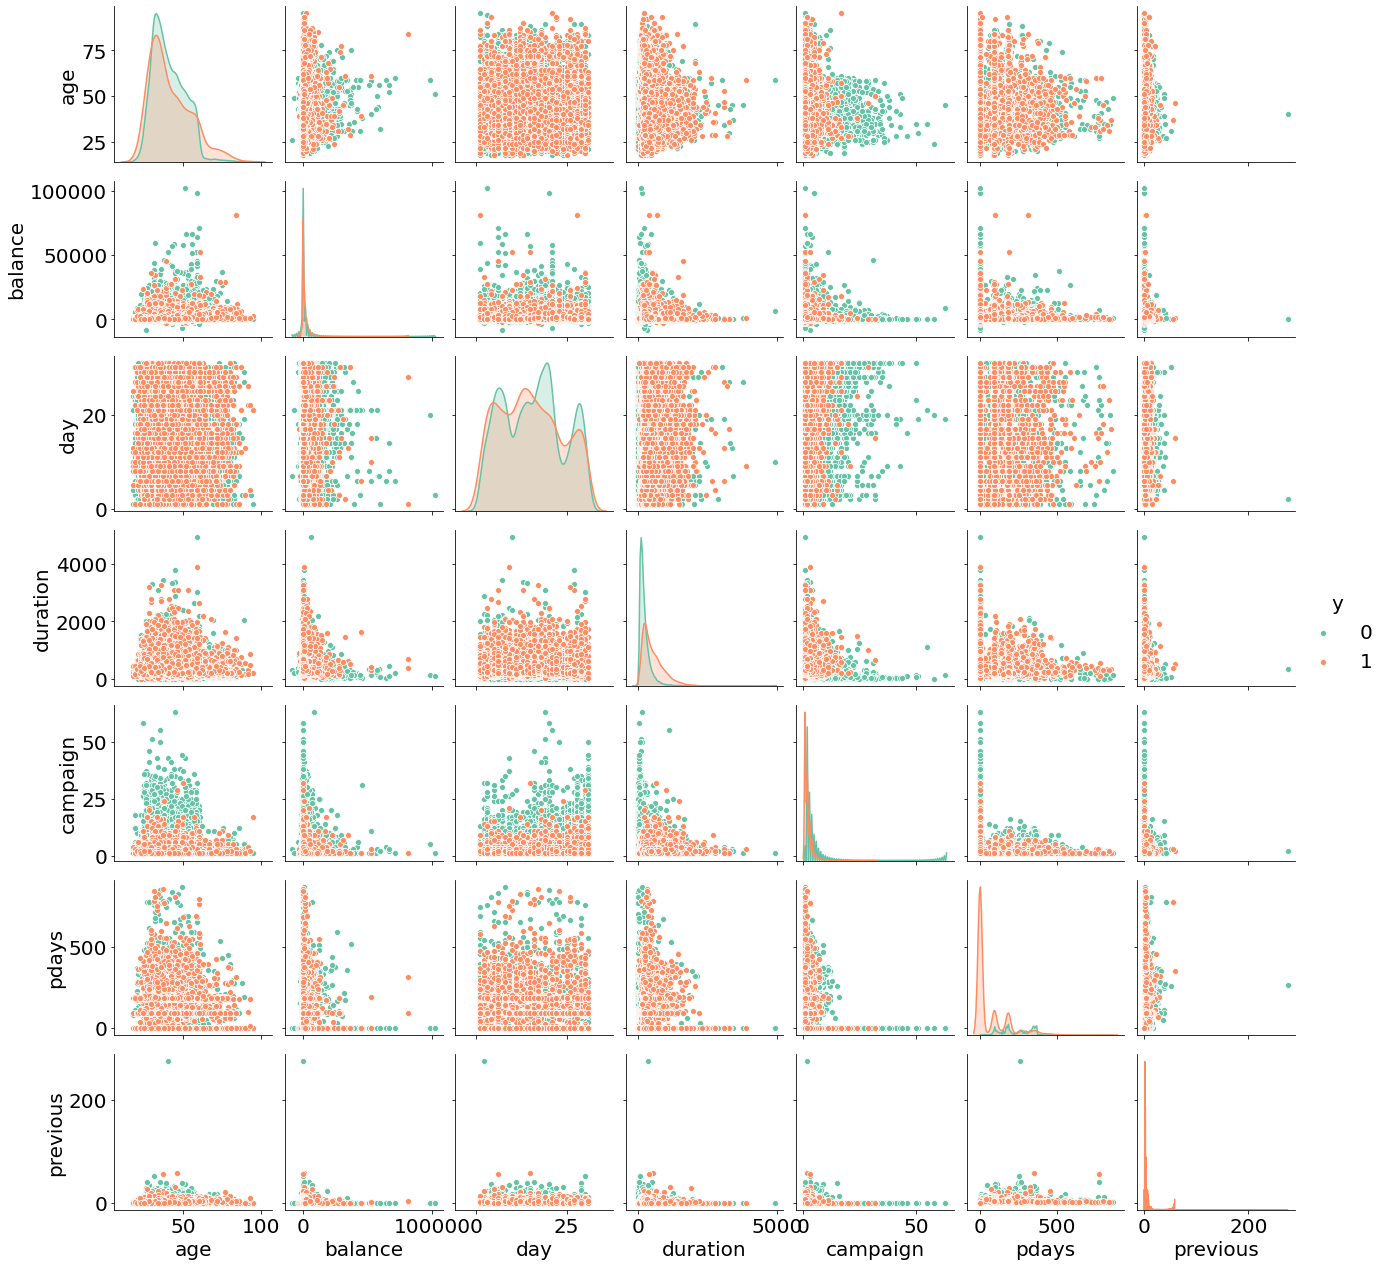

In [53]:
pp=sns.pairplot(bank, hue='y', palette="Set2")
pp

In [12]:
corr = bank.corr()
corr

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


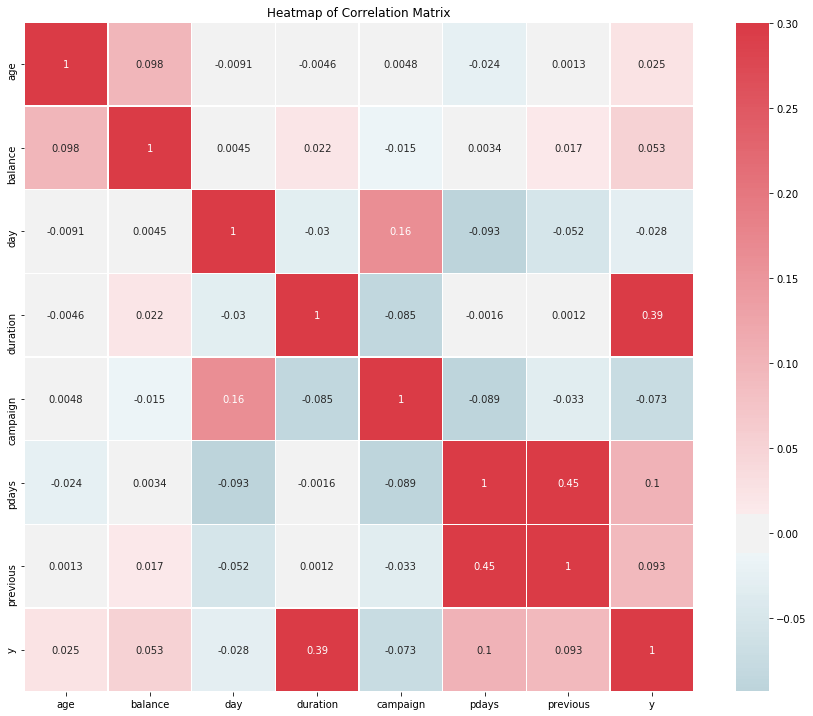

In [13]:
plt.figure(figsize = (15,15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap,
            vmax=.3, center=0, square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')
plt.show()

## Highly correlated from Correlation Matrix

In [14]:
cor_target = abs(corr["y"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.07]
relevant_features.sort_values(ascending=False)


y           1.000000
duration    0.394521
pdays       0.103621
previous    0.093236
campaign    0.073172
Name: y, dtype: float64

In [15]:
df_corr = abs(bank.corr())
df_corr = df_corr['y']
df_corr = pd.DataFrame(relevant_features.values, relevant_features.index).reset_index()
df_corr.columns = ['Feature', 'Corr']
df_corr = df_corr[df_corr['Corr'] > 0.07]
df_corr = df_corr.sort_values(by='Corr', ascending=False)[1:]
df_corr = df_corr.head(20)
df_corr

,Feature,Corr
0,duration,0.394521
2,pdays,0.103621
3,previous,0.093236
1,campaign,0.073172


# MODEL BUILDING

In [16]:
banky = pd.get_dummies(bank, drop_first=True)
banky.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [17]:
X = banky.drop('y',axis=1)
y = banky['y']


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [20]:
X_train.shape,y_train.shape

((31647, 42), (31647,))

# Logistic Regression

In [21]:
import statsmodels.api as sm

logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()
lg.summary()

Optimization terminated successfully.
         Current function value: 0.240639
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31604
Method:                           MLE   Df Model:                           42
Date:                Sun, 17 May 2020   Pseudo R-squ.:                  0.3366
Time:                        08:07:24   Log-Likelihood:                -7615.5
converged:                       True   LL-Null:                       -11479.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.2822      0.220    -10.384      0.000      -2.713      -1.851
age                    -0.0011      0.003     -0.412      0.681      -0.006       0.004
balance              1.506e-05   5.82e-06      2.586      0.010    3.64e-06    2.65e-05
day                     0.0063      0.003      2.120      0.034       0.000       0.012
duration                0.0042   7.69e-05     54.125      0.000       0.004       0.004
campaign               -0.0926      0.012     -7.698      0.000      -0.116      -0.069
pdays                  -0.0007      0.000     -1.759      0.079      -0.001    7.47e-05
previous                0.0272      0.012      2.207      0.027       0.003       0.051
job_blue-collar        -0.2981      0.086     -3.481      0.001      -0.466      -0.130
job_entrepreneur       -0.4649      0.152     -3.053      0.002      -0.763      -0.166
job_housemaid          -0.4888      0.159     -3.075      0.002      -0.800      -0.177
job_management         -0.2683      0.087     -3.074      0.002      -0.439      -0.097
job_retired             0.1994      0.116      1.717      0.086      -0.028       0.427
job_self-employed      -0.3880      0.135     -2.867      0.004      -0.653      -0.123
job_services           -0.2842      0.101     -2.824      0.005      -0.481      -0.087
job_student             0.4108      0.127      3.229      0.001       0.161       0.660
job_technician         -0.1985      0.081     -2.441      0.015      -0.358      -0.039
job_unemployed         -0.2748      0.136     -2.017      0.044      -0.542      -0.008
job_unknown            -0.5989      0.285     -2.101      0.036      -1.158      -0.040
marital_married        -0.2365      0.069     -3.403      0.001      -0.373      -0.100
marital_single          0.0509      0.079      0.642      0.521      -0.104       0.206
education_secondary     0.1922      0.077      2.491      0.013       0.041       0.343
education_tertiary      0.4007      0.090      4.469      0.000       0.225       0.576
education_unknown       0.3052      0.125      2.433      0.015       0.059       0.551
default_yes             0.0045      0.197      0.023      0.982      -0.381       0.390
housing_yes            -0.6869      0.052    -13.221      0.000      -0.789      -0.585
loan_yes               -0.4513      0.071     -6.323      0.000      -0.591      -0.311
contact_telephone      -0.1900      0.089     -2.135      0.033      -0.364      -0.016
contact_unknown        -1.6409      0.088    -18.738      0.000      -1.813      -1.469
month_aug              -0.6318      0.093     -6.791      0.000      -0.814      -0.449
month_dec               0.7215      0.217      3.319      0.001       0.295       1.148
month_feb              -0.1526      0.107     -1.431      0.152      -0.362       0.056
month_jan              -1.2076      0.148     -8.176      0.000      -1.497      -0.918
month_jul              -0.7600      0.091     -8.341      0.000      -0.9

In [22]:
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eliminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(sm.add_constant(X_train),y_train,X_train.columns)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31614
Method:                           MLE   Df Model:                           32
Date:                Sun, 17 May 2020   Pseudo R-squ.:                  0.3314
Time:                        08:07:41   Log-Likelihood:                -7674.1
converged:                       True   LL-Null:                       -11479.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                    -0.0152      0.002     -8.926      0.000      -0.018      -0.012
balance              1.549e-05   5.83e-06      2.654      0.008    4.05e-06    2.69e-05
duration                0.0041   7.65e-05     53.886      0.000       0.004       0.004
campaign               -0.0990      0.012     -8.263      0.000      -0.123      -0.076
pdays                  -0.0022      0.000     -6.614      0.000      -0.003      -0.002
job_blue-collar        -0.6226      0.071     -8.778      0.000      -0.762      -0.484
job_entrepreneur       -0.6791      0.144     -4.729      0.000      -0.961      -0.398
job_housemaid          -0.8150      0.148     -5.516      0.000      -1.105      -0.525
job_management         -0.4613      0.065     -7.061      0.000      -0.589      -0.333
job_self-employed      -0.5938      0.125     -4.757      0.000      -0.839      -0.349
job_services           -0.5179      0.091     -5.683      0.000      -0.697      -0.339
job_technician         -0.4068      0.067     -6.067      0.000      -0.538      -0.275
job_unemployed         -0.5290      0.127     -4.161      0.000      -0.778      -0.280
job_unknown            -0.8172      0.275     -2.968      0.003      -1.357      -0.277
marital_married        -0.4465      0.063     -7.116      0.000      -0.569      -0.324
marital_single         -0.2637      0.065     -4.044      0.000      -0.392      -0.136
education_secondary    -0.1799      0.048     -3.775      0.000      -0.273      -0.086
housing_yes            -0.7959      0.050    -15.890      0.000      -0.894      -0.698
loan_yes               -0.4940      0.071     -6.969      0.000      -0.633      -0.355
contact_unknown        -1.5741      0.086    -18.295      0.000      -1.743      -1.405
month_aug              -0.8080      0.087     -9.237      0.000      -0.980      -0.637
month_dec               0.4940      0.214      2.314      0.021       0.076       0.912
month_feb              -0.4389      0.095     -4.596      0.000      -0.626      -0.252
month_jan              -1.3757      0.141     -9.739      0.000      -1.653      -1.099
month_jul              -0.9434      0.087    -10.890      0.000      -1.113      -0.774
month_jun               0.2061      0.102      2.023      0.043       0.006       0.406
month_mar               1.3140      0.139      9.437      0.000       1.041       1.587
month_may              -0.5912      0.080     -7.376      0.000      -0.748      -0.434
month_nov              -0.9581      0.094    -10.213      0.000      -1.142      -0.774
month_oct               0.7210      0.125      5.753      0.000       0.475       0.967
month_sep               0.5599      0.141      3.977      0.000       0.284       0.836
poutcome_success        2.0153      0.089     22.744      0.000       1.842       2.189
poutcome_unknown       -0.7720      0.086     -8.985      0.000      -0.940      -0.604
=========================================================================

In [23]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))



                     CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
age                      0.981682       0.988239    0.984955   0.000
balance                  1.000004       1.000027    1.000015   0.008
duration                 1.003980       1.004281    1.004130   0.000
campaign                 0.884679       0.927237    0.905708   0.000
pdays                    0.997138       0.998445    0.997791   0.000
job_blue-collar          0.466898       0.616559    0.536536   0.000
job_entrepreneur         0.382698       0.671894    0.507082   0.000
job_housemaid            0.331362       0.591326    0.442654   0.000
job_management           0.554725       0.716614    0.630495   0.000
job_self-employed        0.432350       0.705286    0.552205   0.000
job_services             0.498290       0.712255    0.595743   0.000
job_technician           0.583820       0.759295    0.665801   0.000
job_unemployed           0.459258       0.755943    0.589213   0.000
job_unknown              0.257468 

In [24]:
conf = conf.sort_values(by="Odds Ratio", ascending=False)
pval_filter = conf['pvalue']<=0.1
conf[pval_filter]

,CI 95%(2.5%),CI 95%(97.5%),Odds Ratio,pvalue
poutcome_success,6.306559,8.925636,7.502669,0.000
month_mar,2.832392,4.888629,3.721090,0.000
month_oct,1.608666,2.629209,2.056580,0.000
month_sep,1.328390,2.306522,1.750417,0.000
month_dec,1.078443,2.490516,1.638866,0.021
month_jun,1.006434,1.500412,1.228847,0.043
duration,1.003980,1.004281,1.004130,0.000
balance,1.000004,1.000027,1.000015,0.008
pdays,0.997138,0.998445,0.997791,0.000
age,0.981682,0.988239,0.984955,0.000


In [25]:
import sklearn
new_features=conf.index
X_new=banky[new_features]
y_new=banky['y']
new_features

Index(['poutcome_success', 'month_mar', 'month_oct', 'month_sep', 'month_dec',
       'month_jun', 'duration', 'balance', 'pdays', 'age', 'campaign',
       'education_secondary', 'marital_single', 'job_technician', 'month_feb',
       'marital_married', 'job_management', 'loan_yes', 'job_services',
       'job_unemployed', 'month_may', 'job_self-employed', 'job_blue-collar',
       'job_entrepreneur', 'poutcome_unknown', 'housing_yes', 'month_aug',
       'job_housemaid', 'job_unknown', 'month_jul', 'month_nov', 'month_jan',
       'contact_unknown'],
      dtype='object')

In [26]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=.30,random_state=10)

In [28]:
X_train_smote,y_train_smote=smote.fit_sample(X_train,y_train)

In [29]:
from collections import Counter
print('Before SMOTE:', Counter(y_train))
print('After SMOTE:', Counter(y_train_smote))

Before SMOTE: Counter({0: 27916, 1: 3731})
After SMOTE: Counter({0: 27916, 1: 27916})


In [30]:
LR_model=LogisticRegression()
LR_model.fit(X_train_smote,y_train_smote)
y_predict=LR_model.predict(X_test)

C:\Users\Sarathram\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('Training Accuracy:',LR_model.score(X_train_smote,y_train_smote))

Training Accuracy: 0.9060932798395186


In [32]:
from sklearn.metrics import accuracy_score
print('Testing Accuracy:',accuracy_score(y_test,y_predict))

Testing Accuracy: 0.8626511353583014


In [33]:
pd.crosstab(y_test,y_predict)

col_0,0,1
y,,
0,10808,1198
1,665,893


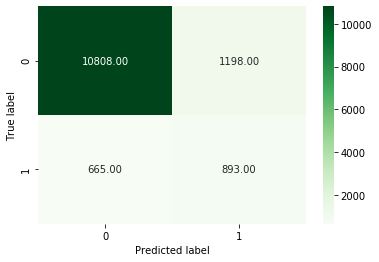

In [34]:
#Function to visulise confusion matrix
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted, [0,1] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] , cmap="Greens")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
draw_cm(y_test, y_predict)

In [35]:
LR_model.predict(X_train_smote)

array([0, 0, 1, ..., 1, 1, 1])

In [36]:
LR_model.predict_proba(X_test)[:,1]

array([0.03180744, 0.0069126 , 0.27811808, ..., 0.02127058, 0.99601977,
       0.00537999])

In [37]:
def predict_threshold(LR_model,X_test,thresholds):
    return np.where(LR_model.predict_proba(X_test)[:,1]>thresholds,1,0)

In [38]:
from sklearn.metrics import confusion_matrix, recall_score
for thr in np.arange(0.1,1.0,0.1):
    y_predict=predict_threshold(LR_model,X_test,thr)
    print('Threshold:',thr)
    print('Recall:',recall_score(y_test,y_predict))
    print(confusion_matrix(y_test,y_predict))

Threshold: 0.1
Recall: 0.8632862644415917
[[8223 3783]
 [ 213 1345]]
Threshold: 0.2
Recall: 0.7740693196405648
[[9418 2588]
 [ 352 1206]]
Threshold: 0.30000000000000004
Recall: 0.6989730423620025
[[10024  1982]
 [  469  1089]]
Threshold: 0.4
Recall: 0.6341463414634146
[[10481  1525]
 [  570   988]]
Threshold: 0.5
Recall: 0.573170731707317
[[10808  1198]
 [  665   893]]
Threshold: 0.6
Recall: 0.5044929396662388
[[11085   921]
 [  772   786]]
Threshold: 0.7000000000000001
Recall: 0.43645699614890887
[[11341   665]
 [  878   680]]
Threshold: 0.8
Recall: 0.35494223363286265
[[11548   458]
 [ 1005   553]]
Threshold: 0.9
Recall: 0.24775353016688062
[[11755   251]
 [ 1172   386]]


In [39]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr,tpr,thresholds=roc_curve(y_test,LR_model.predict_proba(X_test)[:,1])

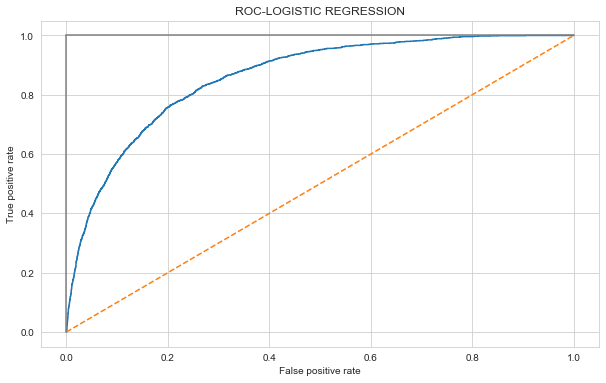

In [40]:
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
#plt.title('Reciver Operating Characterstic Curve')
plt.plot(fpr,tpr)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title('ROC-LOGISTIC REGRESSION')
plt.show()

In [41]:
print('Training roc_auc_score:',roc_auc_score(y_train_smote,LR_model.predict_proba(X_train_smote)[:,1]))

Training roc_auc_score: 0.9616315889309177


In [42]:
print('Test roc_auc_score:',roc_auc_score(y_test,LR_model.predict_proba(X_test)[:,1]))

Test roc_auc_score: 0.860245636702402


In [43]:
from sklearn.metrics import classification_report
print('Training Classification report:\n',classification_report(y_train_smote,LR_model.predict(X_train_smote)))

Training Classification report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91     27916
           1       0.91      0.91      0.91     27916

    accuracy                           0.91     55832
   macro avg       0.91      0.91      0.91     55832
weighted avg       0.91      0.91      0.91     55832



In [44]:
from sklearn.metrics import classification_report
print('Testing Classification report:\n',classification_report(y_test,y_predict))

Testing Classification report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     12006
           1       0.61      0.25      0.35      1558

    accuracy                           0.90     13564
   macro avg       0.76      0.61      0.65     13564
weighted avg       0.87      0.90      0.88     13564



# Decision Tree Classifier - Gini

In [45]:
from sklearn.tree import DecisionTreeClassifier
np.random.seed(7)


In [46]:
dt=DecisionTreeClassifier()

In [47]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[3,4,5,6],
    'max_features':['auto','log2','sqrt'],
    'random_state':[1]
}
# checking best parameters for Decision Tree
grid_tree = GridSearchCV(estimator=dt, param_grid=parameters)
train_tree = grid_tree.fit(X_train_smote,y_train_smote)
best_params = train_tree.best_params_
best_params

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'random_state': 1,
 'splitter': 'best'}

In [48]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=5, max_features='auto',random_state=1,
                            splitter='best')
dt_model = dt.fit(X_train_smote,y_train_smote)
y_predict_dt = dt_model.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score
print('Training Accuracy:',dt_model.score(X_train_smote,y_train_smote))

Training Accuracy: 0.8117387877919473


In [50]:
from sklearn.metrics import accuracy_score
print('Testing Accuracy:',accuracy_score(y_test,y_predict_dt))

Testing Accuracy: 0.7639339427897376


In [51]:
print('Training Classification report:\n',classification_report(y_train_smote,dt.predict(X_train_smote)))

Training Classification report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81     27916
           1       0.80      0.83      0.82     27916

    accuracy                           0.81     55832
   macro avg       0.81      0.81      0.81     55832
weighted avg       0.81      0.81      0.81     55832



In [52]:
from sklearn.metrics import classification_report

print('Testing Classification report:\n',classification_report(y_test,y_predict_dt))

Testing Classification report:
               precision    recall  f1-score   support

           0       0.94      0.79      0.85     12006
           1       0.27      0.60      0.37      1558

    accuracy                           0.76     13564
   macro avg       0.60      0.69      0.61     13564
weighted avg       0.86      0.76      0.80     13564



In [53]:
from sklearn.metrics import classification_report,confusion_matrix
mat_gini = confusion_matrix(y_test,y_predict_dt)
mat_gini

array([[9425, 2581],
       [ 621,  937]], dtype=int64)

In [54]:
print('Testing roc_auc_score:\n',roc_auc_score(y_test,y_predict_dt))

Testing roc_auc_score:
 0.6932181106708092


In [55]:
print('Training roc_auc_score:\n',roc_auc_score(y_train_smote,dt.predict_proba(X_train_smote)[:,1]))

Training roc_auc_score:
 0.8422241443128641


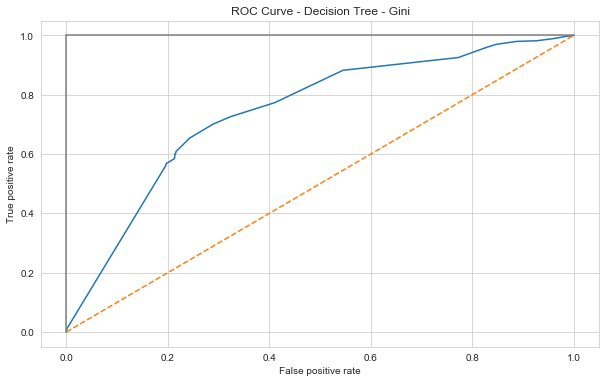

In [56]:
#Get predicted probabilites
target_probailities_log = dt.predict_proba(X_test)[:,1]
#Create true and false positive rates
tree_false_positive_gini,tree_true_positive_gini,log_threshold = roc_curve(y_test,
                                                             target_probailities_log)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('ROC Curve - Decision Tree - Gini')
plt.plot(tree_false_positive_gini,tree_true_positive_gini)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

# Decision Tree Classifier - Entropy

In [57]:
model_entropy=DecisionTreeClassifier(criterion='entropy')

In [58]:
model_entropy.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [59]:
preds_entropy = model_entropy.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score
print('Training Accuracy:',model_entropy.score(X_train_smote,y_train_smote))

Training Accuracy: 1.0


In [61]:
from sklearn.metrics import accuracy_score
print('Testing Accuracy:',accuracy_score(y_test,preds_entropy))

Testing Accuracy: 0.8706871129460336


In [62]:
print('Training roc_auc_score:',roc_auc_score(y_train_smote,model_entropy.predict(X_train_smote)))

Training roc_auc_score: 1.0


In [63]:
from sklearn.metrics import roc_auc_score
print('Testing roc_auc_score:',roc_auc_score(y_test,preds_entropy))

Testing roc_auc_score: 0.7183322117289664


In [64]:
preds_ent_train=model_entropy.predict(X_train_smote)
print('Training classification_report:\n',classification_report(y_train_smote,preds_ent_train))

Training classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     27916
           1       1.00      1.00      1.00     27916

    accuracy                           1.00     55832
   macro avg       1.00      1.00      1.00     55832
weighted avg       1.00      1.00      1.00     55832



In [65]:
print('Testing classification_report:\n',classification_report(y_test,preds_entropy))

Testing classification_report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93     12006
           1       0.45      0.52      0.48      1558

    accuracy                           0.87     13564
   macro avg       0.69      0.72      0.70     13564
weighted avg       0.88      0.87      0.87     13564



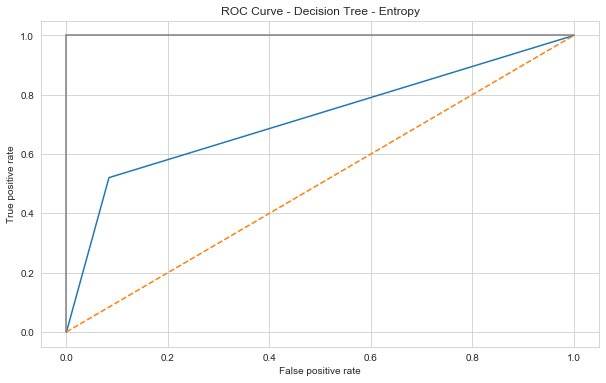

In [66]:
#Get predicted probabilites
target_probailities_log = model_entropy.predict_proba(X_test)[:,1]
#Create true and false positive rates
tree_false_positive_ent,tree_true_positive_ent,log_threshold = roc_curve(y_test,
                                                             target_probailities_log)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('ROC Curve - Decision Tree - Entropy')
plt.plot(tree_false_positive_ent,tree_true_positive_ent)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

## Decision Tree Classifier - Entropy (Pruned)

In [67]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                              max_depth=5, min_samples_leaf=5)
clf_pruned.fit(X_train_smote, y_train_smote)
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train_smote)
from sklearn.metrics import classification_report,confusion_matrix
mat_pruned = confusion_matrix(y_test,preds_pruned)

print("confusion matrix = \n",mat_pruned)

confusion matrix = 
 [[10735  1271]
 [  589   969]]


In [68]:
print('Testing Accuracy:',accuracy_score(y_test,preds_pruned))
print('Training Accuracy:',accuracy_score(y_train_smote,preds_pruned_train))


Testing Accuracy: 0.8628723090533766
Training Accuracy: 0.8515546639919759


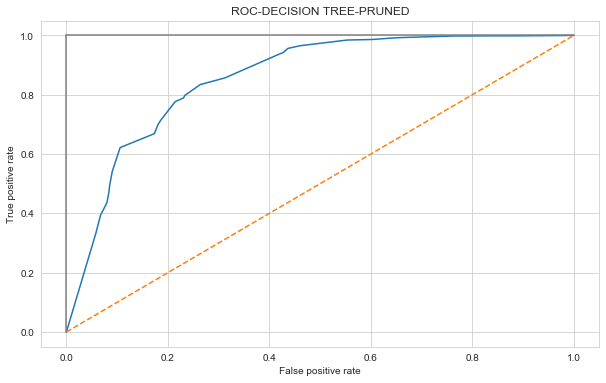

In [69]:
#Get predicted probabilites
target_probailities_log = clf_pruned.predict_proba(X_test)[:,1]
#Create true and false positive rates
tree_false_positive_pruned,tree_true_positive_pruned,log_threshold = roc_curve(y_test,
                                                             target_probailities_log)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('ROC-DECISION TREE-PRUNED')
plt.plot(tree_false_positive_pruned,tree_true_positive_pruned)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [70]:
from sklearn.metrics import roc_auc_score
print('Testing roc_auc_score:',roc_auc_score(y_test,preds_pruned))

Testing roc_auc_score: 0.758043742356464


In [71]:
print('Training roc_auc_score:',roc_auc_score(y_train_smote,clf_pruned.predict(X_train_smote)))

Training roc_auc_score: 0.851554663991976


In [72]:
print('Testing classification_report:\n',classification_report(y_test,preds_pruned))

Testing classification_report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92     12006
           1       0.43      0.62      0.51      1558

    accuracy                           0.86     13564
   macro avg       0.69      0.76      0.72     13564
weighted avg       0.89      0.86      0.87     13564



In [73]:
print('Training classification_report:\n',classification_report(y_train_smote,clf_pruned.predict(X_train_smote)))

Training classification_report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86     27916
           1       0.89      0.81      0.84     27916

    accuracy                           0.85     55832
   macro avg       0.85      0.85      0.85     55832
weighted avg       0.85      0.85      0.85     55832



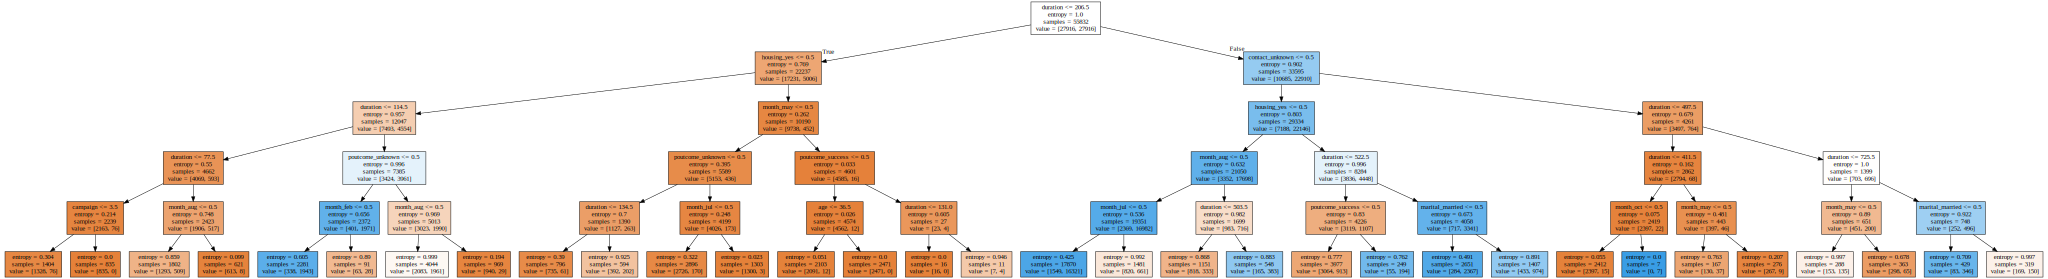

In [74]:
#import export_graphviz 
from sklearn.tree import export_graphviz

# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(clf_pruned, out_file ='tree.dot',filled=True,feature_names=X_new.columns) 
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graph=graphviz.Source(dot_graph)
graph

In [75]:
#graph.format = "png"
#graph.render("BankMarketingDT")

In [76]:
feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)
print("feat importance = " + str(feat_importance))


feat importance = [4.34446756e-03 0.00000000e+00 8.82316020e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.47828455e-01 0.00000000e+00
 0.00000000e+00 2.41417970e-04 9.36954143e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.67087864e-03 4.33933161e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.83143217e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.03965523e-02 8.80348717e-02 3.76036937e-02 0.00000000e+00
 0.00000000e+00 2.48143293e-02 0.00000000e+00 0.00000000e+00
 6.90507586e-02]


In [77]:
feature_cols = X.columns
feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
previous,0.488837
loan_yes,0.173647
month_jul,0.136201
contact_telephone,0.074173
month_dec,0.048946
housing_yes,0.040232
education_secondary,0.013475
age,0.008569
job_technician,0.008559
job_student,0.003296


In [78]:
from sklearn.metrics import confusion_matrix, recall_score
for thr in np.arange(0.1,1.0,0.1):
    y_predict=predict_threshold(clf_pruned,X_test,thr)
    print('Threshold:',thr)
    print('Recall:',recall_score(y_test,preds_pruned))
    print(confusion_matrix(y_test,preds_pruned))

Threshold: 0.1
Recall: 0.6219512195121951
[[10735  1271]
 [  589   969]]
Threshold: 0.2
Recall: 0.6219512195121951
[[10735  1271]
 [  589   969]]
Threshold: 0.30000000000000004
Recall: 0.6219512195121951
[[10735  1271]
 [  589   969]]
Threshold: 0.4
Recall: 0.6219512195121951
[[10735  1271]
 [  589   969]]
Threshold: 0.5
Recall: 0.6219512195121951
[[10735  1271]
 [  589   969]]
Threshold: 0.6
Recall: 0.6219512195121951
[[10735  1271]
 [  589   969]]
Threshold: 0.7000000000000001
Recall: 0.6219512195121951
[[10735  1271]
 [  589   969]]
Threshold: 0.8
Recall: 0.6219512195121951
[[10735  1271]
 [  589   969]]
Threshold: 0.9
Recall: 0.6219512195121951
[[10735  1271]
 [  589   969]]


## Random Forest Classifier

In [79]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
import warnings
warnings.filterwarnings("ignore")

In [80]:
RF_model = RandomForestClassifier()

In [81]:
RF_model.fit(X_train_smote,y_train_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [82]:
ypred_rft = RF_model.predict(X_train_smote)

In [83]:
print('Training classification_report:\n',classification_report(y_train_smote,ypred_rft))

Training classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     27916
           1       1.00      1.00      1.00     27916

    accuracy                           1.00     55832
   macro avg       1.00      1.00      1.00     55832
weighted avg       1.00      1.00      1.00     55832



In [84]:
ypred_rf = RF_model.predict(X_test)

In [85]:
print('Testing classification_report:\n',classification_report(y_test,ypred_rf))

Testing classification_report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94     12006
           1       0.57      0.53      0.55      1558

    accuracy                           0.90     13564
   macro avg       0.75      0.74      0.74     13564
weighted avg       0.90      0.90      0.90     13564



In [86]:
print(confusion_matrix(y_test,ypred_rf))

[[11376   630]
 [  738   820]]


In [87]:
from sklearn.metrics import accuracy_score
print('Testing accuracy:',accuracy_score(y_test,ypred_rf))

Testing accuracy: 0.8991447950457092


In [88]:
print('Training accuracy:',accuracy_score(y_train_smote,RF_model.predict(X_train_smote)))

Training accuracy: 1.0


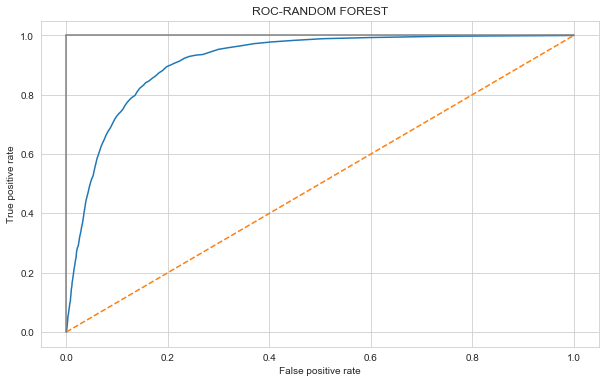

In [89]:
#Get predicted probabilites
target_probailities_log = RF_model.predict_proba(X_test)[:,1]
#Create true and false positive rates
tree_false_positive_RF,tree_true_positive_RF,log_threshold = roc_curve(y_test,
                                                             target_probailities_log)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('ROC-RANDOM FOREST')
plt.plot(tree_false_positive_RF,tree_true_positive_RF)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [90]:
from sklearn.metrics import roc_auc_score
print('Testing roc_auc_score:',roc_auc_score(y_test,ypred_rf))

Testing roc_auc_score: 0.7369210131776216


In [91]:
print('Training roc_auc_score:',roc_auc_score(y_train_smote,RF_model.predict(X_train_smote)))

Training roc_auc_score: 1.0


## Gradient Boosting Classifier

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

GB_model=GradientBoostingClassifier(n_estimators=100, random_state=10)

In [93]:
GB_model.fit(X_train_smote,y_train_smote)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [94]:
ypred_gb=GB_model.predict(X_test)

In [95]:
print('Testing classification_report:\n',classification_report(y_test,ypred_gb))



Testing classification_report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94     12006
           1       0.51      0.63      0.56      1558

    accuracy                           0.89     13564
   macro avg       0.73      0.78      0.75     13564
weighted avg       0.90      0.89      0.89     13564



In [96]:
print(confusion_matrix(y_test,ypred_gb))


[[11074   932]
 [  579   979]]


In [97]:
from sklearn.metrics import accuracy_score
print('Testing accuracy:',accuracy_score(y_test,ypred_gb))
print('Training Accuracy:',GB_model.score(X_train_smote,y_train_smote))



Testing accuracy: 0.8886021822471247
Training Accuracy: 0.9294132397191575


In [98]:
#Get predicted probabilites
target_probailities_log_gb = GB_model.predict_proba(X_test)[:,1]
#Create true and false positive rates
tree_false_positive_gb,tree_true_positive_gb,log_threshold = roc_curve(y_test,
                                                             target_probailities_log_gb)

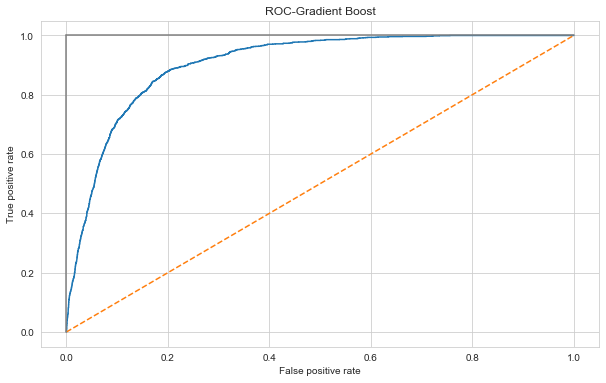

In [99]:
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('ROC-Gradient Boost')
plt.plot(tree_false_positive_gb,tree_true_positive_gb)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()


In [100]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
result = []
names = []
models=[]
models.append(('Logistic Regression',LR_model))
models.append(('Decision Tree',dt))
models.append(('Decision Tree (Entropy)',model_entropy))
models.append(('Decision Tree (Pruned)',clf_pruned))

models.append(('RandomForest',RF_model))
models.append(('GradientBoosting',GB_model))


for name, model in models:
    kfold = model_selection.KFold(shuffle=True, n_splits=10, random_state=0)
    cv_results = model_selection.cross_val_score(model, X_train_smote, y_train_smote, cv=kfold, scoring='roc_auc')
    result.append(cv_results)
    names.append(name)
    print('%s: \n Bias Error : (%f) Variance Error : (%f)' %(name, 1-np.mean(cv_results), np.var(cv_results,ddof = 1)))


Logistic Regression: 
 Bias Error : (0.047226) Variance Error : (0.000070)
Decision Tree: 
 Bias Error : (0.156525) Variance Error : (0.000024)
Decision Tree (Entropy): 
 Bias Error : (0.080867) Variance Error : (0.000006)
Decision Tree (Pruned): 
 Bias Error : (0.081582) Variance Error : (0.000027)
RandomForest: 
 Bias Error : (0.012125) Variance Error : (0.000000)
GradientBoosting: 
 Bias Error : (0.020611) Variance Error : (0.000002)


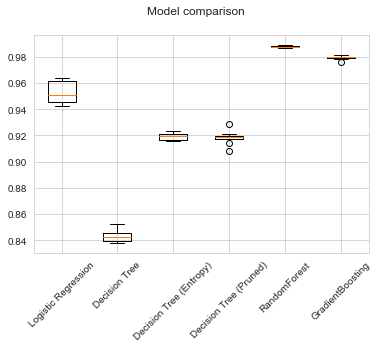

In [101]:
fig=plt.figure()
fig.suptitle('Model comparison')
ax=fig.add_subplot(111)
plt.boxplot(result)
ax.set_xticklabels(names, rotation=45)
plt.show()


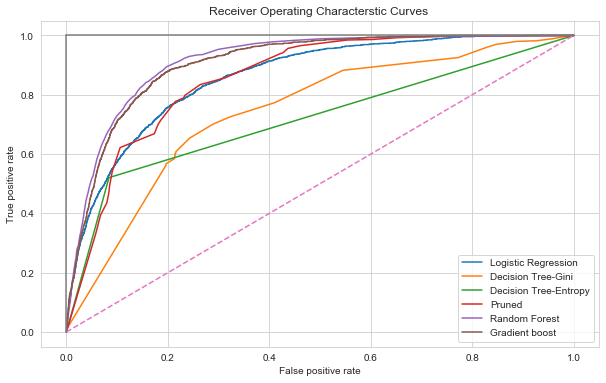

In [102]:
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Receiver Operating Characterstic Curves ')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.plot(tree_false_positive_gini,tree_true_positive_gini,label='Decision Tree-Gini')
plt.plot(tree_false_positive_ent,tree_true_positive_ent,label='Decision Tree-Entropy')
plt.plot(tree_false_positive_pruned,tree_true_positive_pruned,label='Pruned')
plt.plot(tree_false_positive_RF,tree_true_positive_RF,label='Random Forest')
plt.plot(tree_false_positive_gb,tree_true_positive_gb,label='Gradient boost')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()


#### Observation : From the model comparison of KFold Cross Validation and the ROC curves, Random Forest seems to perform better. Since it is an overfitting model, we can take the next better model Gradient Boosting as the favourable model for classifying the clients who will subscribe for a term deposit. 

## Gradient Boost - Model Coefficients

In [103]:
importance = GB_model.feature_importances_
# summarize feature importance
for i,v in zip(X_new.columns,importance):
    print('Feature: %s, Score: %.5f' % (i,v))

Feature: poutcome_success, Score: 0.01500
Feature: month_mar, Score: 0.00001
Feature: month_oct, Score: 0.00057
Feature: month_sep, Score: 0.00081
Feature: month_dec, Score: 0.00012
Feature: month_jun, Score: 0.00677
Feature: duration, Score: 0.35219
Feature: balance, Score: 0.00058
Feature: pdays, Score: 0.00494
Feature: age, Score: 0.00326
Feature: campaign, Score: 0.00959
Feature: education_secondary, Score: 0.01830
Feature: marital_single, Score: 0.03318
Feature: job_technician, Score: 0.00763
Feature: month_feb, Score: 0.01180
Feature: marital_married, Score: 0.03364
Feature: job_management, Score: 0.02035
Feature: loan_yes, Score: 0.01542
Feature: job_services, Score: 0.00376
Feature: job_unemployed, Score: 0.00200
Feature: month_may, Score: 0.03472
Feature: job_self-employed, Score: 0.00204
Feature: job_blue-collar, Score: 0.02070
Feature: job_entrepreneur, Score: 0.00196
Feature: poutcome_unknown, Score: 0.03859
Feature: housing_yes, Score: 0.13466
Feature: month_aug, Score: 0.

## Important features from the model coefficients

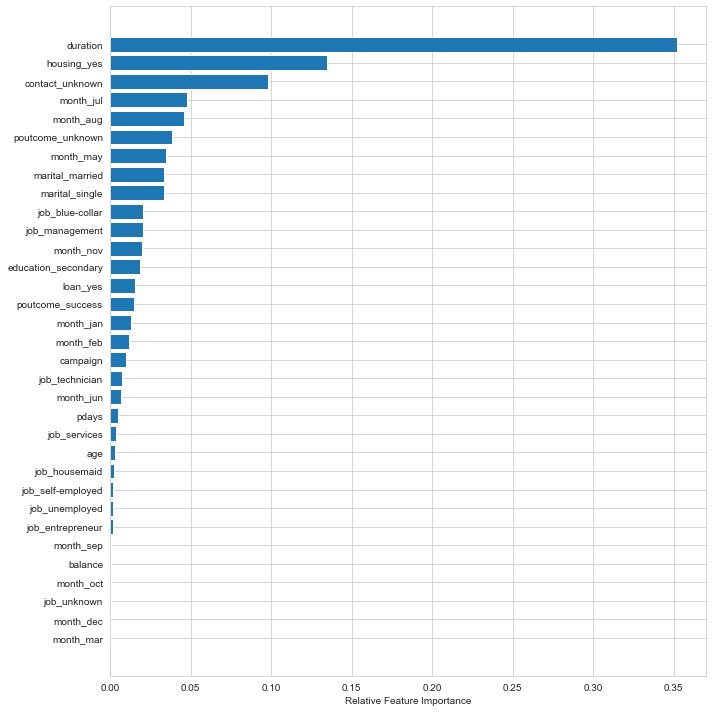

In [104]:
feature_importance = abs(GB_model.feature_importances_)
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize =(10,10))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_new.columns)[sorted_idx])
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

**What type of customers Subscribe term deposits?** 

Based on the Gradient Boosting Classifier model, the following are the potential types of customers who will subscribe for the term deposit:
 1. Duration is the highly correlated feature. Customers who have engaged in high duration when contacted have a very high likelihood to subscribe for the term deposit. Obviously, this shows the interest of the customer in subscribing a term deposit.
 2. Customers who have a housing loan are more likely to subscribe for a term deposit.